In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
df_set = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_48.pkl'))

In [3]:
path = r'/Users/jakubkondelka/Documents/CF_Instacart Basket Analysis'

In [6]:
df_set = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_48.pkl'))

In [7]:
df_set.head()

,order_id,user_id,evaluations,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,Busiest days,Busiest_period_of_day,max_order,loyalty_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,10,New customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Fewest orders,10,New customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,77,7,9.0,both,Mid-range product,Least busy,Least busy,Fewest orders,10,New customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,77,7,9.0,both,Mid-range product,Least busy,Least busy,Most orders,10,New customer


<AxesSubplot:>

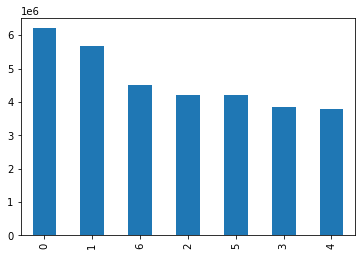

In [8]:
df_set['orders_day_of_week'].value_counts().plot.bar()

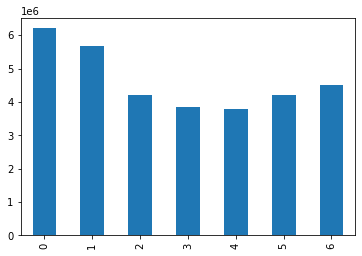

In [9]:
bar = df_set['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [11]:
df_set['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [12]:
df_set['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

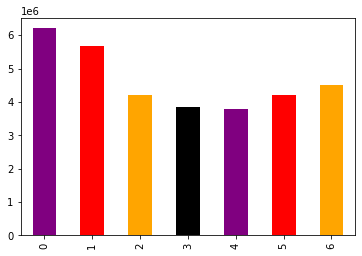

In [13]:
# add color to Plot.bar

bar = df_set['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'orange', 'black'])

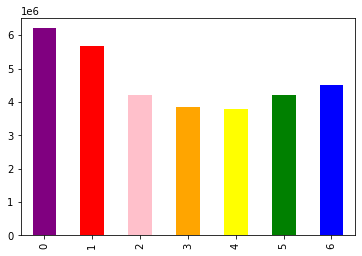

In [15]:
# add more color to Plot.bar()
bar = df_set['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [17]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_orders_dow.png'))

### Histogram

<AxesSubplot:ylabel='Frequency'>

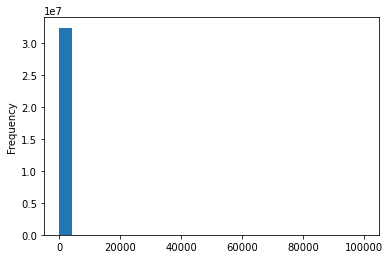

In [18]:
df_set['prices'].plot.hist(bins = 25)

### Scatterplot

<AxesSubplot:xlabel='prices', ylabel='prices'>

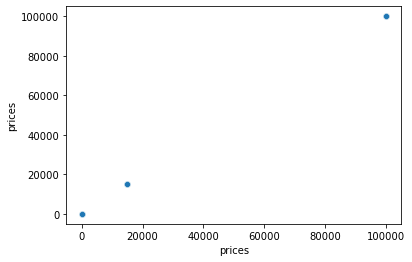

In [19]:
# Prices against themselves so that I can see potential outliers
sns.scatterplot(x = 'prices', y = 'prices',data = df_set)

In [20]:
# strange data to 20,000 and 100,000. We can check all data bigger than a 100$
# this will give us an idea, because hardly would anyone pay more than 100$ in supermarket

df_set.loc[df_set['prices'] > 100]

,order_id,user_id,evaluations,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,Busiest days,Busiest_period_of_day,max_order,loyalty_flag
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,...,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,...,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,...,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Fewest orders,4,New customer
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,...,108,16,14900.0,both,High-range product,Busiest day,Busiest day,Most orders,4,New customer
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,...,108,16,14900.0,both,High-range product,Regularly busy,Busiest day,Average orders,16,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.0,33664,1,0,...,84,16,99999.0,both,High-range product,Busiest day,Busiest day,Most orders,39,Regular customer
29166210,2363282,204099,prior,31,0,9,2.0,33664,1,1,...,84,16,99999.0,both,High-range product,Busiest day,Busiest day,Most orders,39,Regular customer
29166211,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,84,16,99999.0,both,High-range product,Regularly busy,Least busy,Most orders,15,Regular customer
29166212,2486215,205227,prior,7,3,20,4.0,33664,8,0,...,84,16,99999.0,both,High-range product,Regularly busy,Least busy,Fewest orders,12,Regular customer


In [22]:
# mark outliers as missing
df_set.loc[df_set['prices'] >100, 'prices'] = np.nan

In [23]:
df_set.loc[df_set['prices'] > 100]

,order_id,user_id,evaluations,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,Busiest days,Busiest_period_of_day,max_order,loyalty_flag


In [25]:
# run a max value check
df_set['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

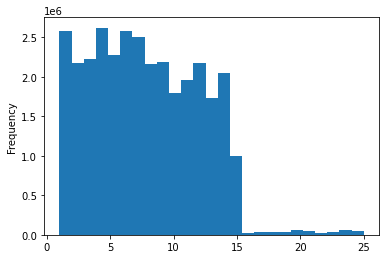

In [26]:
#now, retry Histogram command
df_set['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

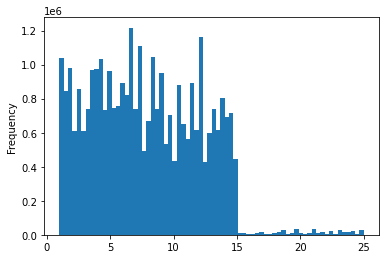

In [27]:
# increasr granularity
df_set['prices'].plot.hist(bins = 70)

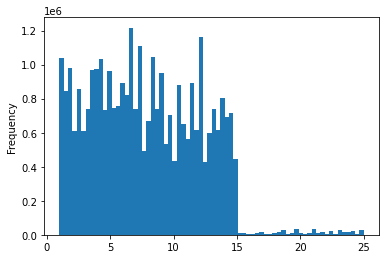

In [28]:
hist = df_set['prices'].plot.hist(bins = 70)

In [29]:
# export HIST
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'histogram_prices.png'))

In [30]:
df = df_set[:2000000]

In [31]:
df.tail()

,order_id,user_id,evaluations,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,Busiest days,Busiest_period_of_day,max_order,loyalty_flag
1999995,183520,205921,prior,2,1,9,30.0,24852,9,0,...,24,4,12.3,both,Mid-range product,Regularly busy,Busiest day,Most orders,7,New customer
1999996,3315075,205923,prior,1,3,17,NaN,24852,1,0,...,24,4,12.3,both,Mid-range product,Regularly busy,Least busy,Most orders,11,Regular customer
1999997,2672941,205928,prior,1,6,13,NaN,24852,1,0,...,24,4,12.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,3,New customer
1999998,3235789,205928,prior,2,3,15,18.0,24852,1,1,...,24,4,12.3,both,Mid-range product,Regularly busy,Least busy,Most orders,3,New customer
1999999,1089798,205928,prior,3,0,10,11.0,24852,1,1,...,24,4,12.3,both,Mid-range product,Busiest day,Busiest day,Most orders,3,New customer


In [32]:
#

### Sampling data 

In [33]:
# basically, we assing random numbers between 0 - 1 to all rows. Than, we want to work for example with 70%,
# that means we take all values < .7

In [34]:
np.random.seed(4)
dev = np.random.rand(len(df_set)) <= 0.7

In [36]:
# store 70% in variable big. All True values, i.e. numbers that were below 0.7
big = df_set[dev]

In [37]:
# store 30% in variable small. All False random numbers bigger than 0.7 
small = df_set[~dev]

In [38]:
# check if 70 + 30 = 100 by checking length of original set and addition of the two 70/30 sets
len(df_set)

32404859

In [39]:
len(big) + len(small)

32404859

In [40]:
# selecting only columns I need for the Line chart
df_2 = small[['orders_day_of_week','prices']]

### Line Chart

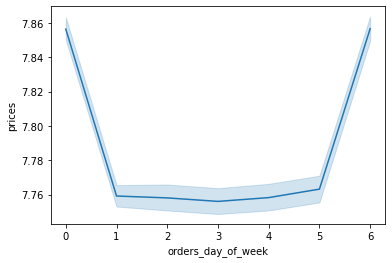

In [41]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [44]:
df_2.describe()

,orders_day_of_week,prices
count,9.721098e+06,9.719502e+06
mean,2.740095e+00,7.791261e+00
std,2.090351e+00,4.242010e+00
min,0.000000e+00,1.000000e+00
25%,1.000000e+00,4.200000e+00
50%,3.000000e+00,7.400000e+00
75%,5.000000e+00,1.130000e+01
max,6.000000e+00,2.500000e+01
